<a href="https://colab.research.google.com/github/Aryan49SM/Convolution_Neural_Network/blob/master/3_VGG16_Keras_Rooms_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ibrahimalobaid/rooms-classification

Dataset URL: https://www.kaggle.com/datasets/ibrahimalobaid/rooms-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 32% 5.00M/15.6M [00:00<00:00, 34.5MB/s]
100% 15.6M/15.6M [00:00<00:00, 69.0MB/s]


In [ ]:
! unzip rooms-classification.zip

Archive:  rooms-classification.zip
  inflating: rooms_dataset/bed_room/apartment-2094734__340.jpg  
  inflating: rooms_dataset/bed_room/apartment-4744139__340.jpg  
  inflating: rooms_dataset/bed_room/architecture-2141065__340.jpg  
  inflating: rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg  
  inflating: rooms_dataset/bed_room/baby-1266117__340.jpg  
  inflating: rooms_dataset/bed_room/bath-753272__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1048194__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1232590__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1303451__340 (1).jpg  
  inflating: rooms_dataset/bed_room/bed-1303451__340.jpg  
  inflating: rooms_dataset/bed_room/bed-142516__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1846251__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1853443__340.jpg  
  inflating: rooms_dataset/bed_room/bed-1853907__340.jpg  
  inflating: rooms_dataset/bed_room/bed-186346__340.jpg  
  inflating

## VGGNET with keras and rooms dataset

In [ ]:
from __future__ import print_function

import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.python.keras.utils import layer_utils
from tensorflow.keras.utils import get_source_inputs
from keras.preprocessing import image
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras import backend as K


In [ ]:
!pip install keras_applications
from keras_applications.imagenet_utils import _obtain_input_shape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
print(keras.__version__)

3.5.0


In [ ]:
tf.__version__

'2.17.1'

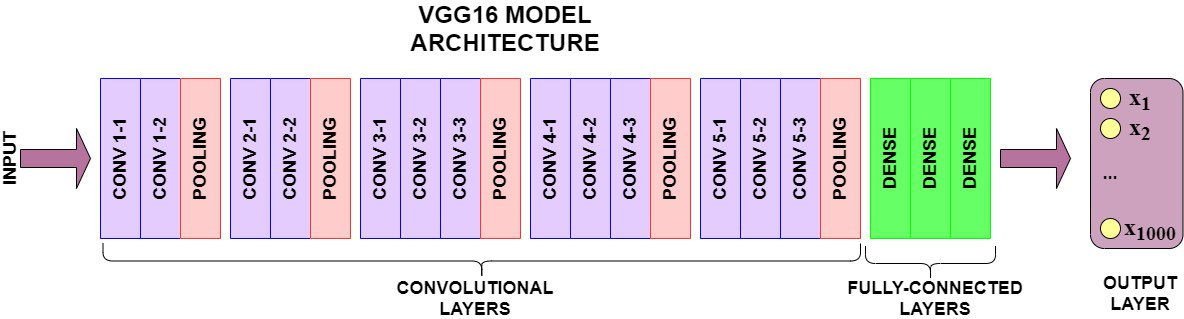

In [ ]:
def VGGupdated(input_tensor=None,classes=3):

    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)

    img_input = Input(shape=img_dim)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.


    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model


In [ ]:
model = VGGupdated(classes = 3)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('rooms_dataset')

room_types = os.listdir('rooms_dataset')
print (room_types)

print("Types of rooms found: ", len(dataset_path))



['living_room', 'bed_room', 'dining_room']
Types of rooms found:  3


In [ ]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('rooms_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('rooms_dataset' + '/' +item) + '/' + room))
    print(rooms)

[('living_room', 'rooms_dataset/living_room/architecture-2558255__340.jpg')]
[('living_room', 'rooms_dataset/living_room/architecture-2558255__340.jpg'), ('living_room', 'rooms_dataset/living_room/couch-1835923__340.jpg')]
[('living_room', 'rooms_dataset/living_room/architecture-2558255__340.jpg'), ('living_room', 'rooms_dataset/living_room/couch-1835923__340.jpg'), ('living_room', 'rooms_dataset/living_room/profile-1567015265962-16daf81adf73image.png')]
[('living_room', 'rooms_dataset/living_room/architecture-2558255__340.jpg'), ('living_room', 'rooms_dataset/living_room/couch-1835923__340.jpg'), ('living_room', 'rooms_dataset/living_room/profile-1567015265962-16daf81adf73image.png'), ('living_room', 'rooms_dataset/living_room/couch-576136__340.png')]
[('living_room', 'rooms_dataset/living_room/architecture-2558255__340.jpg'), ('living_room', 'rooms_dataset/living_room/couch-1835923__340.jpg'), ('living_room', 'rooms_dataset/living_room/profile-1567015265962-16daf81adf73image.png'), (

In [ ]:
# Build a dataframe
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())

     room type                                              image
0  living_room  rooms_dataset/living_room/architecture-2558255...
1  living_room   rooms_dataset/living_room/couch-1835923__340.jpg
2  living_room  rooms_dataset/living_room/profile-156701526596...
3  living_room    rooms_dataset/living_room/couch-576136__340.png
4  living_room  rooms_dataset/living_room/pexels-photo-279618....


In [ ]:
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

Total number of rooms in the dataset:  393
rooms in each category: 
room type
bed_room       159
living_room    148
dining_room     86
Name: count, dtype: int64


In [ ]:
import cv2
path = 'rooms_dataset/'
im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(393, 300, 300, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
y = y.reshape(-1,1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y)
print(Y.shape)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
(393, 3)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# Shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(373, 300, 300, 3)
(373, 3)
(20, 300, 300, 3)
(20, 3)


In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.4199 - loss: 7.5780
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 37s 835ms/step - accuracy: 0.3729 - loss: 1.1132
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 840ms/step - accuracy: 0.3785 - loss: 1.0585
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 847ms/step - accuracy: 0.4153 - loss: 1.0571
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 836ms/step - accuracy: 0.4174 - loss: 1.0548
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 841ms/step - accuracy: 0.4227 - loss: 1.0519
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 834ms/step - accuracy: 0.4415 - loss: 1.0574
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 827ms/step - accuracy: 0.3873 - loss: 1.0710
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 827ms/step - accuracy: 0.4173 - loss: 1.0589
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 823ms/step - accuracy: 0.4339 - loss: 1.0634


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.3000 - loss: 1.1439
Loss = 1.1439287662506104


## Input from user and classify that image

Input image shape: (1, 300, 300, 3)


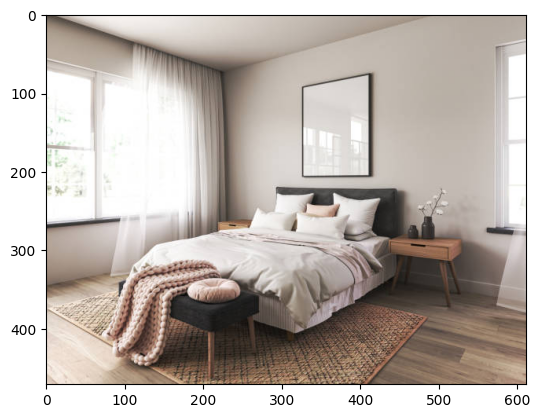

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = 'test_img.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0.38147542 0.26475143 0.3537732 ]]
